Topic: [5. Numerical integration of the HH model of the squid axon](https://lcn-neurodynex-exercises.readthedocs.io/en/latest/exercises/hodgkin-huxley.html)

Information: [Chapter 2 Section 2 -- Hodgkin-Huxley model](https://neuronaldynamics.epfl.ch/online/Ch2.S2.html)

More introduction on HH model(Notes after the exercise):
+ [Computational Neuroscience Course Page](http://dai.fmph.uniba.sk/courses/comp-neuro/)
+ [Biological Signal Processing-Chapter 3 Hodgkin-Huxley Model]( http://www.mrc.uidaho.edu/~rwells/techdocs/Biological%20Signal%20Processing/Chapter%2003%20The%20Hodgkin-Huxley%20Model.pdf)
+ [Chapter 3 Membrane Ion Channel](https://www.math.fsu.edu/~quine/biotopics07/KandSCh3.pdf)

author email:wulfram.gerstner@epfl.ch

***

## Overview
+ **Exercise 5.1**

The lowest step current input that could generate one/repetitive spikes?

+ **Exercise 5.2**

slow and fast ramp current that could generate a spike.

Not only charge and current amplitude determine to have a spike, but also the "shape" of input current.

+ **Exercise 5.3**

rebound spike: generate after stop the hyperpolarizing current input.

+ **Exercise 5.4**

Change HH model parameters by rewriting function `simulate_HH_neuron()`.

In increased Na conductance can cause automatic firing.



## Question
+ in `simulate_HH_neuron()`, why `vm` starts from value 0?

---

WARNING    Cannot use Cython, a test compilation failed: Microsoft Visual C++ 14.0 is required. Get it with "Microsoft Visual C++ Build Tools": http://landinghub.visualstudio.com/visual-cpp-build-tools (DistutilsPlatformError) [brian2.codegen.runtime.cython_rt.cython_rt.failed_compile_test]
INFO       Cannot use compiled code, falling back to the numpy code generation target. Note that this will likely be slower than using compiled code. Set the code generation to numpy manually to avoid this message:
prefs.codegen.target = "numpy" [brian2.devices.device.codegen_fallback]


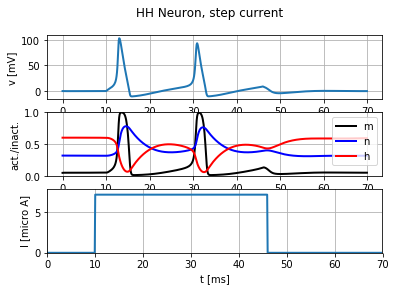

In [2]:
% matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.hodgkin_huxley import HH
from neurodynex3.tools import spike_tools
from neurodynex3.tools import input_factory
from scipy.signal import argrelmax

HH.getting_started()

## 5.1. Exercise: step current response

The [`hodgkin_huxley.HH module`](https://lcn-neurodynex-exercises.readthedocs.io/en/latest/modules/neurodynex3.hodgkin_huxley.html#module-neurodynex3.hodgkin_huxley.HH) contains all code required for this exercise. 

We study the response of a Hodgkin-Huxley neuron to different input currents. Have a look at the documentation of the functions `HH.simulate_HH_neuron()` and `HH.plot_data()` and the module [`neurodynex3.tools.input_factory`](https://lcn-neurodynex-exercises.readthedocs.io/en/latest/modules/neurodynex3.tools.html#module-neurodynex3.tools.input_factory).


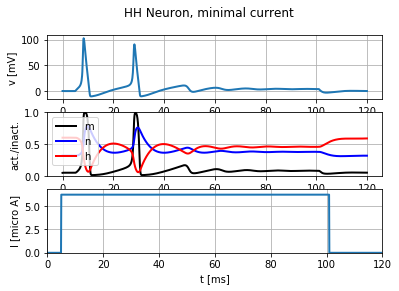

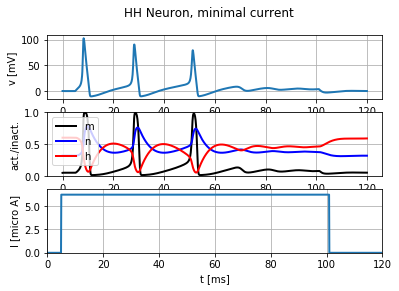

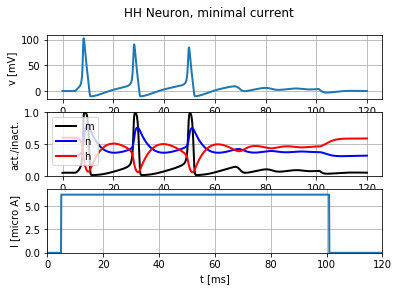

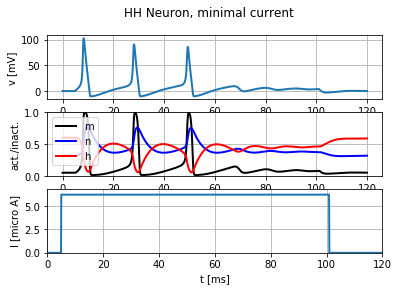

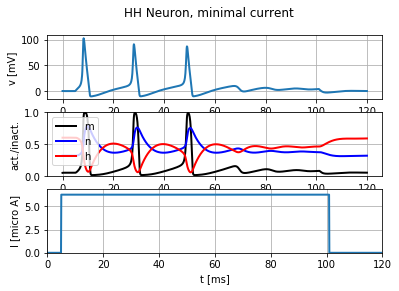

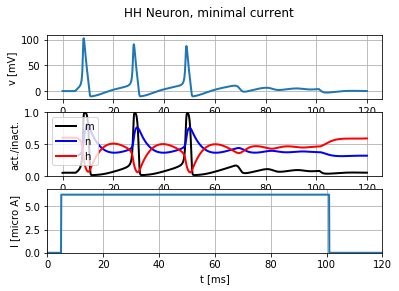

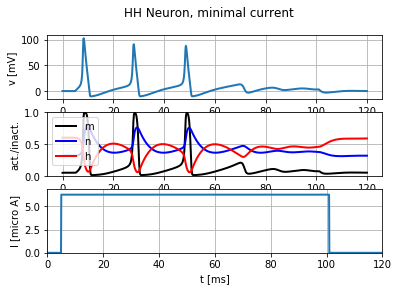

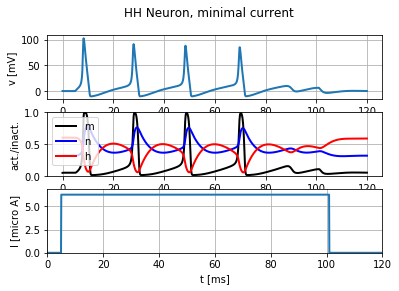

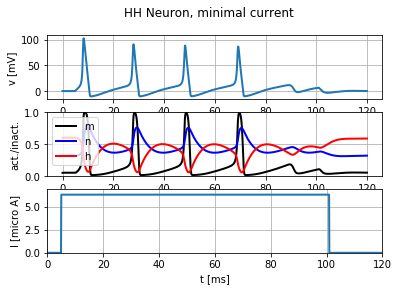

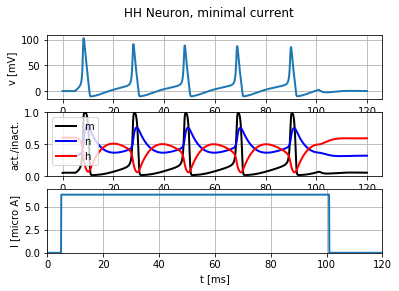

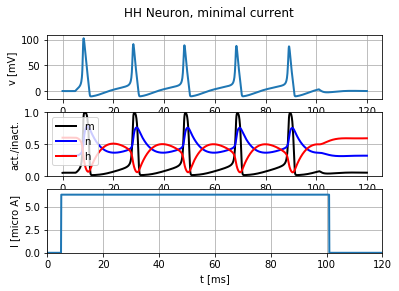

In [182]:
# make a first glimpse of I&spike
I_inputs = np.linspace(6.2,6.3,11)
spike_peak = 50*b2.mV;
for ii in I_inputs:
    current = input_factory.get_step_current(t_start=5, 
                                             t_end=100, 
                                             unit_time =b2.ms, 
                                             amplitude=ii *b2.uA)

    state_monitor = HH.simulate_HH_neuron(current, simulation_time=120 * b2.ms)
    HH.plot_data(state_monitor, title="HH Neuron, minimal current")

    

### 5.1.1. Question

What is the lowest step current amplitude `Imin` for generating at least one spike? Determine the value by trying different input amplitudes(0.01 accuracy)
<br><br>
<font color='green'>
$I_{min-a-spike} = 2.30 \mu A  (\approx0.01)$
</font>

The minimal current for at least a spike is: 2.30


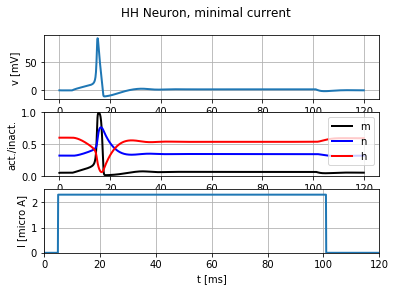

In [172]:
I_inputs = np.linspace(2,2.5,51)
spike_peak = 50*b2.mV;
for ii in I_inputs:
    current = input_factory.get_step_current(t_start=5, 
                                             t_end=100, 
                                             unit_time =b2.ms, 
                                             amplitude=ii *b2.uA)

    state_monitor = HH.simulate_HH_neuron(current, simulation_time=120 * b2.ms)
    # HH.plot_data(state_monitor, title="HH Neuron, minimal current")
    voltage = state_monitor.state('vm')
    if sum(voltage>spike_peak)>=1:
        print("The minimal current for at least a spike is: {:.2f}".format(ii));
        HH.plot_data(state_monitor, title="HH Neuron, minimal current")
        break
        
    

### 5.1.2. Question

What is the lowest step current amplitude to generate repetitive firing?
<br><br>
<font color='green'>
The method is:
<br>
&emsp;1.determine the spike timestamps
<br>
&emsp;2.$\Delta t = T_{end-of-current}- T_{last-spike} < 2* \Delta t_{mean-spike-interval}$, then spikes are repetitive
  double-value of mean interval as the threshold is to make sure that the last long interval is not because the last spike do not 
  have enough time get stimulated.
<br><br>
However, as is shown in the result, this threshold tolerates the situation when the last spike cannot get triggered even if
stimulation time is enough.
<br>
Apparantly, this method of determining repetitive spikes should be optimized if necessary.
<br>
We can then visualize voltage potential with current input 6.20~6.30
<br><br> 

$I_{min-repetitive-spike} = 6.27 \mu A  (\approx0.01)$
</font>

<br><br>
Discuss the difference between the two regimes.(0.01 accuracy)
<br>
<font color='red'>
I don't quite understand why the lower current input can trigger one spike and then not anymore
</font>

The minimal current for repetitive spikes is: 6.27


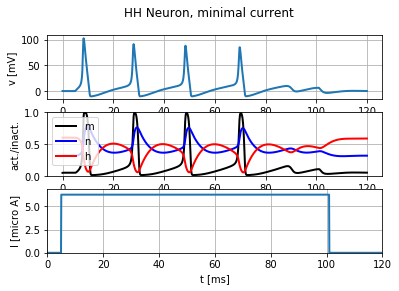

In [180]:
I_inputs = np.linspace(6,7,101)
spike_peak = 50*b2.mV;
for ii in I_inputs:
    current = input_factory.get_step_current(t_start=5, 
                                             t_end=100, 
                                             unit_time =b2.ms, 
                                             amplitude=ii *b2.uA)

    state_monitor = HH.simulate_HH_neuron(current, simulation_time=120 * b2.ms)
    # HH.plot_data(state_monitor, title="HH Neuron, minimal current")

    voltage = state_monitor.vm[0]
    relmax_index = argrelmax(voltage) # get partial maximums' index
    relmax_voltage = voltage[relmax_index]
    a=(relmax_voltage>=spike_peak) * np.linspace(1,len(relmax_voltage),len(relmax_voltage)) # filter that blow threshold
    if len(a)==0:
        continue;
        
    a=a[~np.equal(a, 0)] # delete 0 value
    a=a.astype(int)-1# -1 because the index shouls start from 0
    spike_index = np.array(relmax_index[0][a])
    
    # determine if it is a repetitive spike sequence
    s_1=spike_index;
    if spike_index.size>1:
        s_2=spike_index[1:]
        s_2=np.append(s_2,1000)
    elif spike_index.size==1:
        s_2=[1000]
    else:
        continue
        

    t_d = s_2 - s_1
    if t_d[-1] < 2*np.mean(t_d[:-1]):
        # np.mean(t_d[:-1])+np.std(t_d[:-1]):
        # this is to make sure the last long interval is not because the last spike 
        # don't get enough stimulize time
        print("The minimal current for repetitive spikes is: {:.2f}".format(ii));
        HH.plot_data(state_monitor, title="HH Neuron, minimal current")
        break
        
    

## 5.2. Exercise: slow and fast ramp current

The minimal current to elicit a spike does not just depend on the amplitude `I` or on the total charge `Q` of the current, but on the “shape” of the current. Let’s see why:

### 5.2.1. Question

Inject a slow ramp current into a HH neuron. The current has amplitude 0A at t in [0, 5] ms and linearly increases to an amplitude of 12.0uAmp at `t=ramp_t_end`. At `t>ramp_t_end`, the current is set to 0A. Using the following code, reduce `slow_ramp_t_end` to the maximal duration of the ramp current, such that the neuron does not spike. Make sure you simulate system for at least 20ms after the current stops.

What is the membrane voltage at the time when the current injection stops `(t=slow_ramp_t_end)`?
<br>
<font color='green'>
To reduce `slow_ramp_t_end`, input ramp current get steap.
<br>
A spike occurs when input current duration is reduced to 49ms
</font>

ramp current for 49 ms trigger a spike


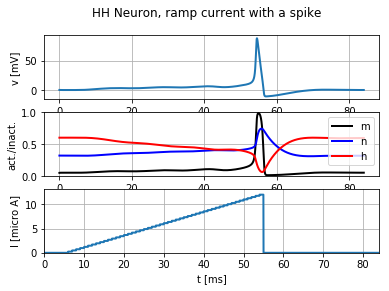

voltage_slow=34.92835136 mV
Input charge q: 243. nC


In [5]:
slow_ramp_t_end_choices = np.linspace(60,50,11)
spike_peak = 50*b2.mV;
b2.defaultclock.dt = 0.02*b2.ms # state_monitor record voltage every 1/50 ms
for ii in slow_ramp_t_end_choices:

    ii=int(ii)
    after_end_t = 30
    slow_ramp_current = input_factory.get_ramp_current(t_start=5, 
                                                       t_end=ii, 
                                                       unit_time=b2.ms, 
                                                       amplitude_start=0.*b2.uA, 
                                                       amplitude_end=12.0*b2.uA)
    state_monitor = HH.simulate_HH_neuron(slow_ramp_current, 
                                          simulation_time = (ii+after_end_t) * b2.ms)
    
    voltage = state_monitor.vm[0];
    if sum(voltage>spike_peak)>0:
        print("ramp current for {} ms trigger a spike".format(ii-5))
        HH.plot_data(state_monitor, title="HH Neuron, ramp current with a spike")
            
        # Find the voltage when input current end
        idx_t_end = int(round(ii*b2.ms / b2.defaultclock.dt))
        voltage_slow = state_monitor.vm[0,idx_t_end]
        print("voltage_slow={}".format(voltage_slow))
        print('Input charge q: {}'.format(ii*b2.ms*4.5*b2.uA))
        
        break
    else:
        # HH.plot_data(state_monitor, title="HH Neuron, ramp current with 0 spike")
        continue


### 5.2.2. Question

Do the same as before but for a fast ramp current: The maximal amplitude at t=ramp_t_end is 4.5uAmp. Start with fast_ramp_t_end = 8ms and then increase it until you observe a spike. 

Note: Technically the input current is implemented using a TimedArray. For a short, steep ramp, the one millisecond discretization for the current is not high enough. You can create a finer resolution by setting the parameter unit_time in the function input_factory.get_ramp_current() (see next code block).

What is the membrane voltage at the time when the current injection stops (t=fast_ramp_t_end)?

ramp current for 4 ms trigger a spike


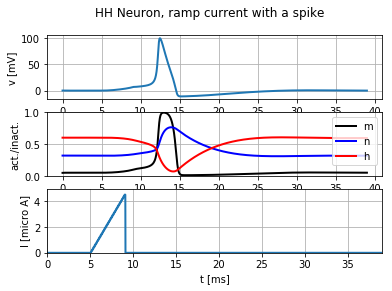

voltage_slow=6.54029859 mV
Input charge q: 40.5 nC


In [6]:
slow_ramp_t_end_choices = np.linspace(8,20,13)
spike_peak = 50*b2.mV;
for ii in slow_ramp_t_end_choices:

    ii=int(ii)
    b2.defaultclock.dt = 0.02*b2.ms
    slow_ramp_t_end = 60  # no spike. make it shorter, but at least larger than 5
    after_end_t = 30
    slow_ramp_current = input_factory.get_ramp_current(t_start=50, 
                                                       t_end=ii*10, 
                                                       unit_time=0.1*b2.ms, 
                                                       amplitude_start=0.*b2.uA, 
                                                       amplitude_end=4.5*b2.uA)
    state_monitor = HH.simulate_HH_neuron(slow_ramp_current, 
                                          simulation_time = (ii+after_end_t) * b2.ms)
    
    voltage = state_monitor.vm[0];
    if sum(voltage>spike_peak)>0:
        print("ramp current for {} ms trigger a spike".format(ii-5))
        HH.plot_data(state_monitor, title="HH Neuron, ramp current with a spike")
        
        # Find the voltage when input current end
        idx_t_end = int(round(ii*b2.ms / b2.defaultclock.dt))
        voltage_slow = state_monitor.vm[0,idx_t_end]
        print("voltage_slow={}".format(voltage_slow))
        print('Input charge q: {}'.format(ii*b2.ms*4.5*b2.uA))
        
        break
    else:
        # HH.plot_data(state_monitor, title="HH Neuron, ramp current with 0 spike") 
        continue
    
    # Find the voltage when input current end
    #idx_t_end = int(round(slow_ramp_t_end*b2.ms / b2.defaultclock.dt))
    # voltage_slow = state_monitor.vm[0,idx_t_end]
    # print("voltage_slow={}".format(voltage_slow))

### 5.2.3. Question
Use the function `HH.plot_data()` to visualize the dynamics of the system for the fast and the slow case above. Discuss the differences between the two situations. Why are the two “threshold” voltages different? Link your observation to the gating variables `m`, `n`, and `h`. 
<br>
*Hint: have a look at Chapter 2 Figure 2.3.*

<font color='green'>
What is "threshold voltage" refered in the question?

The fast ramp current inject much less charge than the slow ramp current, but the m,n increase and h decrease are faster.

</font>

## 5.3. Exercise: Rebound Spike
A HH neuron can spike not only if it receives a sufficiently strong depolarizing input current but also after a hyperpolarizing current. Such a spike is called a **rebound spike**.

### 5.3.1. Question
Inject a hyperpolarizing step current I_amp = -1 uA for 20ms into the HH neuron. Simulate the neuron for 50 ms and plot the voltage trace and the gating variables. Repeat the simulation with I_amp = -5 uA 

What is happening here? To which gating variable do you attribute this rebound spike?

<font color='green'>
Compare the gating parameter plot, `h` shows an increase when current input is -5 $\mu A$. The hyperpolarization current cause the membrane voltage lower than rest potential, and *h_0*  is increased. 

</font>

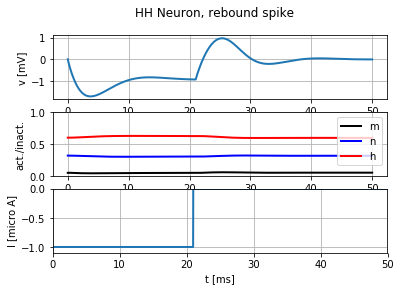

Input current I = -1. uA


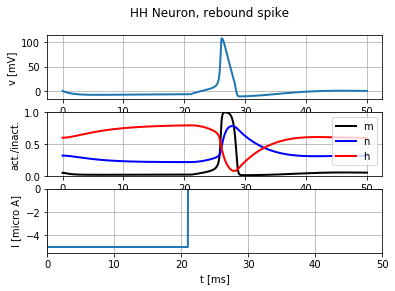

Input current I = -5. uA


In [8]:
# make a first glimpse of I&spike
I_inputs = np.linspace(-1,-5,2)
spike_peak = 50*b2.mV;
for ii in I_inputs:
    current = input_factory.get_step_current(t_start=0, 
                                             t_end=20, 
                                             unit_time =b2.ms, 
                                             amplitude=ii *b2.uA)

    state_monitor = HH.simulate_HH_neuron(current, simulation_time=50 * b2.ms)
    HH.plot_data(state_monitor, title="HH Neuron, rebound spike")
    print('Input current I = {}'.format(ii*b2.uA))
        


## 5.4. Exercise: Brian implementation of a HH neuron

In this exercise you will learn to work with the Brian2 model equations. To do so, get the source code of the function [`HH.simulate_HH_neuron()`](https://lcn-neurodynex-exercises.readthedocs.io/en/latest/_modules/neurodynex3/hodgkin_huxley/HH.html#simulate_HH_neuron) (follow the link to the documentation and then click on the [source] link). Copy the function code and paste it into your Jupyter Notebook. Change the function name from `simulate_HH_neuron()` to a name of your choice. Have a look at the source code and find the conductance parameters *gK* and *gNa*.

### 5.4.1. Question

In the source code of your function, change the density of sodium channels. Increase it by a factor of 1.4. Stimulate this modified neuron with a step current.

In [ ]:
%pfile HH.simulate_HH_neuron # see the doc

In [9]:
def my_simulate_HH_neuron(input_current, simulation_time):

    """A Hodgkin-Huxley neuron implemented in Brian2.

    Args:
        input_current (TimedArray): Input current injected into the HH neuron
        simulation_time (float): Simulation time [seconds]

    Returns:
        StateMonitor: Brian2 StateMonitor with recorded fields
        ["vm", "I_e", "m", "n", "h"]
    """

    # neuron parameters
    El = 10.6 * b2.mV
    EK = -12 * b2.mV
    ENa = 115 * b2.mV
    gl = 0.3 * b2.msiemens
    gK = 36 * b2.msiemens         # found
    gNa = 120 * b2.msiemens * 1.4 # found 
                                  # increase by a factor of 1.4
    C = 1 * b2.ufarad

    # forming HH model with differential equations
    eqs = """
    I_e = input_current(t,i) : amp
    membrane_Im = I_e + gNa*m**3*h*(ENa-vm) + \
        gl*(El-vm) + gK*n**4*(EK-vm) : amp
    alphah = .07*exp(-.05*vm/mV)/ms    : Hz
    alpham = .1*(25*mV-vm)/(exp(2.5-.1*vm/mV)-1)/mV/ms : Hz
    alphan = .01*(10*mV-vm)/(exp(1-.1*vm/mV)-1)/mV/ms : Hz
    betah = 1./(1+exp(3.-.1*vm/mV))/ms : Hz
    betam = 4*exp(-.0556*vm/mV)/ms : Hz
    betan = .125*exp(-.0125*vm/mV)/ms : Hz
    dh/dt = alphah*(1-h)-betah*h : 1
    dm/dt = alpham*(1-m)-betam*m : 1
    dn/dt = alphan*(1-n)-betan*n : 1
    dvm/dt = membrane_Im/C : volt
    """

    neuron = b2.NeuronGroup(1, eqs, method="exponential_euler")

    # parameter initialization
    neuron.vm = 0
    neuron.m = 0.05
    neuron.h = 0.60
    neuron.n = 0.32

    # tracking parameters
    st_mon = b2.StateMonitor(neuron, ["vm", "I_e", "m", "n", "h"], record=True)

    # running the simulation
    hh_net = b2.Network(neuron)
    hh_net.add(st_mon)
    hh_net.run(simulation_time)

    return st_mon


+ What is the minimal current leading to repetitive spiking? Explain.

<font color='green'>
$I_{min-repetitive-spike}=1.08 \mu A$ , (accurate to 0.01)
<br>
The higher *gNa* increases the Na channel in flow current, membrane voltage will be easier to reach the firing threshold.
</font>

WARNING    D:\Anaconda3\envs\bmnn\lib\site-packages\numpy\core\fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
 [py.warnings]
WARNING    D:\Anaconda3\envs\bmnn\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 [py.warnings]
WARNING    D:\Anaconda3\envs\bmnn\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in less
 [py.warnings]


The minimal current for repetitive spikes is: 1.07


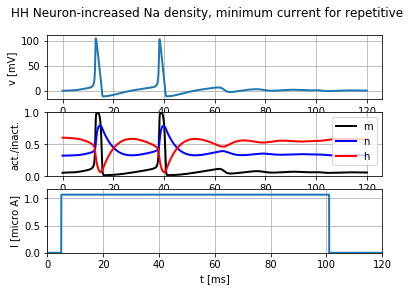

In [28]:
I_inputs = np.linspace(1,1.5,51)
spike_peak = 50*b2.mV;
for ii in I_inputs:
    current = input_factory.get_step_current(t_start=5, 
                                             t_end=100, 
                                             unit_time =b2.ms, 
                                             amplitude=ii *b2.uA)

    state_monitor = my_simulate_HH_neuron(current, simulation_time=120 * b2.ms)
    # HH.plot_data(state_monitor, title="HH Neuron, minimal current")

    voltage = state_monitor.vm[0]
    relmax_index = argrelmax(voltage) # get partial maximums' index
    relmax_voltage = voltage[relmax_index]
    a=(relmax_voltage>=spike_peak) * np.linspace(1,len(relmax_voltage),len(relmax_voltage)) # filter that blow threshold
    if len(a)==0:
        continue;
        
    a=a[~np.equal(a, 0)] # delete 0 value
    a=a.astype(int)-1# -1 because the index shouls start from 0
    spike_index = np.array(relmax_index[0][a])
    
    # determine if it is a repetitive spike sequence
    s_1=spike_index;
    if spike_index.size>1:
        s_2=spike_index[1:]
        s_2=np.append(s_2,1000)
    elif spike_index.size==1:
        s_2=[1000]
    else:
        continue
        

    t_d = s_2 - s_1
    if t_d[-1] < 1.5 * np.mean(t_d[:-1]):
        # +np.std(t_d[:-1]):
        # this is to make sure the last long interval is not because the last spike 
        # don't get enough stimulize time
        print("The minimal current for repetitive spikes is: {:.2f}".format(ii));
        HH.plot_data(state_monitor, title="HH Neuron-increased Na density, minimum current for repetitive ")
        break
        
    

+ Run a simulation with no input current to determine the resting potential of the neuron. Link your observation to the Goldman–Hodgkin–Katz voltage equation.


<font color='green'>
The increase of Na channel density will increase the resting potential.
</font>


WARNING    D:\Anaconda3\envs\bmnn\lib\site-packages\matplotlib\axes\_base.py:3193: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))
 [py.warnings]


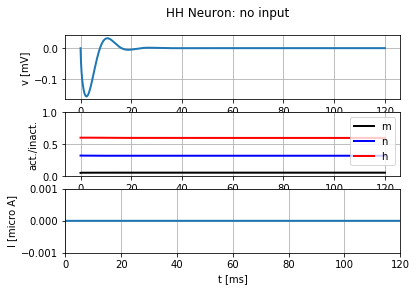

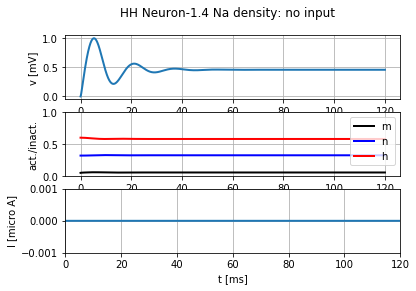

In [36]:
current = input_factory.get_step_current(t_start=5, 
                                         t_end=100, 
                                         unit_time =b2.ms, 
                                         amplitude=0*b2.uA)
state_monitor = HH.simulate_HH_neuron(current, simulation_time=120 * b2.ms)
HH.plot_data(state_monitor, title="HH Neuron: no input")

state_monitor = my_simulate_HH_neuron(current, simulation_time=120 * b2.ms)
HH.plot_data(state_monitor, title="HH Neuron-1.4 Na density: no input")


+ [Goldman–Hodgkin–Katz voltage equation](https://www.physiologyweb.com/calculators/ghk_equation_calculator.html):
<br>
original from:
$$
\begin{align}
p(E)&=exp(-E/KT) \\
E&=u(x)*q \\
\frac{n(x_{in})}{n(x_{out})}=exp(-\frac{q}{KT}*(u(x_1)-u(x_2)) &\iff \Delta u=u(x_1)-u(x_2)=\frac{KT}{q} \cdot 
ln[\frac{n(x_{in})}{n(x_{out})}] 
\end{align}
$$

The GHK voltage equation is:

$V_m=\frac{q}{KT}ln\frac{p_K*[K^+]_o+p_{Na}*[Na^+]_o+p_{Cl}*[Cl^-]_i}{p_K*[K^+]_i+p_{Na}*[Na^+]_i+p_{Cl}*[Cl^-]_o},Na_o > Na_i$
<br>
Therefore, the increase on $p_{Na}$ will increase the $V_m$

+ [The linear form of Nerst Equation:](https://www.math.fsu.edu/~quine/biotopics07/KandSCh3.pdf):

$V_m = \frac{g_K*E_K+g_{Na}*E_{Na}}{g_K+g_{Na}}$

+ If you increase the sodium conductance further, you can observe repetitive firing even in the absence of input, why?

WARNING    D:\Anaconda3\envs\bmnn\lib\site-packages\matplotlib\axes\_base.py:3193: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))
 [py.warnings]


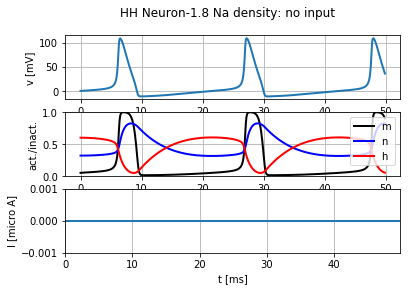

In [5]:
def my_2_simulate_HH_neuron(input_current, simulation_time):

    """A Hodgkin-Huxley neuron implemented in Brian2.

    Args:
        input_current (TimedArray): Input current injected into the HH neuron
        simulation_time (float): Simulation time [seconds]

    Returns:
        StateMonitor: Brian2 StateMonitor with recorded fields
        ["vm", "I_e", "m", "n", "h"]
    """

    # neuron parameters
    El = 10.6 * b2.mV
    EK = -12 * b2.mV
    ENa = 115 * b2.mV
    gl = 0.3 * b2.msiemens
    gK = 36 * b2.msiemens         # found
    gNa = 120 * b2.msiemens * 1.9 # found 
                                  # increase by a factor of 1.4
    C = 1 * b2.ufarad

    # forming HH model with differential equations
    eqs = """
    I_e = input_current(t,i) : amp
    membrane_Im = I_e + gNa*m**3*h*(ENa-vm) + \
        gl*(El-vm) + gK*n**4*(EK-vm) : amp
    alphah = .07*exp(-.05*vm/mV)/ms    : Hz
    alpham = .1*(25*mV-vm)/(exp(2.5-.1*vm/mV)-1)/mV/ms : Hz
    alphan = .01*(10*mV-vm)/(exp(1-.1*vm/mV)-1)/mV/ms : Hz
    betah = 1./(1+exp(3.-.1*vm/mV))/ms : Hz
    betam = 4*exp(-.0556*vm/mV)/ms : Hz
    betan = .125*exp(-.0125*vm/mV)/ms : Hz
    dh/dt = alphah*(1-h)-betah*h : 1
    dm/dt = alpham*(1-m)-betam*m : 1
    dn/dt = alphan*(1-n)-betan*n : 1
    dvm/dt = membrane_Im/C : volt
    """

    neuron = b2.NeuronGroup(1, eqs, method="exponential_euler")

    # parameter initialization
    neuron.vm = 0
    neuron.m = 0.05
    neuron.h = 0.60
    neuron.n = 0.32

    # tracking parameters
    st_mon = b2.StateMonitor(neuron, ["vm", "I_e", "m", "n", "h"], record=True)

    # running the simulation
    hh_net = b2.Network(neuron)
    hh_net.add(st_mon)
    hh_net.run(simulation_time)

    return st_mon


current = input_factory.get_step_current(t_start=5, 
                                         t_end=30, 
                                         unit_time =b2.ms, 
                                         amplitude=0*b2.uA)

state_monitor = my_2_simulate_HH_neuron(current, simulation_time=50 * b2.ms)
HH.plot_data(state_monitor, title="HH Neuron-1.8 Na density: no input")

---
reference: [Spontaneous Oscillations in Hodgkin-Huxley Model](https://www.researchgate.net/publication/253366827_Spontaneous_Oscillations_in_Hodgkin-Huxley_Model)
By 1 bifurcation analysis on HH model, they get automatic neuron firing in:
   + increase sodium conductance
   + decrease potassium conductance
   + increase extracellular potassium concentration [experiment tested]

The first two senarios need to be further tested by channel activator&blocker
They used XPPAUT to analysis, and I will reproduce as in the paper.

___

---
**H-H model from 2.2-Table2.1 & Equation (2.4) (2.5)**



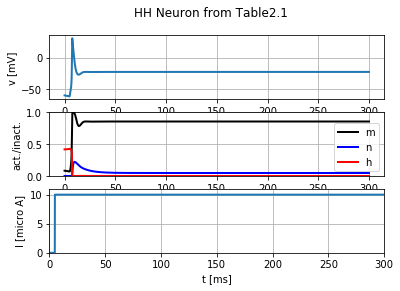

In [29]:
def HH_neuron(input_current, simulation_time):

    """A Hodgkin-Huxley neuron implemented in Brian2.

    Args:
        input_current (TimedArray): Input current injected into the HH neuron
        simulation_time (float): Simulation time [seconds]

    Returns:
        StateMonitor: Brian2 StateMonitor with recorded fields
        ["vm", "I_e", "m", "n", "h"]
    """

    # neuron parameters
    ENa = 55 * b2.mV
    EK = -77 * b2.mV
    El = -65 * b2.mV
     
    gNa = 40 * b2.msiemens 
    gK = 35 * b2.msiemens   
    gl = 0.3 * b2.msiemens

    C = 1 * b2.ufarad

    # forming HH model with differential equations
    eqs = """
    I_e = input_current(t,i) : amp
    membrane_Im = I_e + gNa*m**3*h*(ENa-vm) + \
        gl*(El-vm) + gK*n**4*(EK-vm) : amp
    alphah = 0.25*exp(-(vm/mV+90)/12)/ms    : Hz
    alpham = 0.182*(35*mV+vm)/(1-exp(-(vm/mV+35)/9))/mV/ms : Hz
    alphan = 0.02*(-25*mV+vm)/(1-exp(-(vm/mV-25)/9))/mV/ms : Hz
    betah = 0.25*exp((vm/mV+62)/6)/exp((vm/mV+90)/12)/ms : Hz
    betam = -0.124*(vm/mV+35)/(1-exp((vm/mV+35)/9))/ms : Hz
    betan = -0.002*(vm/mV-25)/(1-exp((vm/mV-25)/9))/ms : Hz
    dh/dt = alphah*(1-h)-betah*h : 1
    dm/dt = alpham*(1-m)-betam*m : 1
    dn/dt = alphan*(1-n)-betan*n : 1
    dvm/dt = membrane_Im/C : volt
    """
    
    neuron = b2.NeuronGroup(1, eqs, method="exponential_euler")

    # parameter initialization
    neuron.vm = -60*b2.mV
    neuron.h = 0.25*exp(-(neuron.vm/b2.mV+90)/12)/(0.25*exp(-(neuron.vm/b2.mV+90)/12)+0.25*exp((neuron.vm/b2.mV+62)/6)/exp((neuron.vm/b2.mV+90)/12))
    neuron.m = (0.182*(35+neuron.vm/b2.mV)/(1-exp(-(neuron.vm/b2.mV+35)/9)))/((0.182*(35+neuron.vm/b2.mV)/(1-exp(-(neuron.vm/b2.mV+35)/9)))-0.124*(neuron.vm/b2.mV+35)/(1-exp((neuron.vm/b2.mV+35)/9)))
    neuron.n = (0.02*(-25+neuron.vm/b2.mV)/(1-exp(-(neuron.vm/b2.mV-25)/9)))/(0.02*(-25+neuron.vm/b2.mV)/(1-exp(-(neuron.vm/b2.mV-25)/9))-0.002*(neuron.vm/b2.mV-25)/(1-exp((neuron.vm/b2.mV-25)/9)))

    # tracking parameters
    st_mon = b2.StateMonitor(neuron, ["vm", "I_e", "m", "n", "h"], record=True)

    # running the simulation
    hh_net = b2.Network(neuron)
    hh_net.add(st_mon)
    hh_net.run(simulation_time)

    return st_mon


# step current input
current = input_factory.get_step_current(t_start=5, 
                                         t_end=300, 
                                         unit_time =b2.ms, 
                                         amplitude=10*b2.uA)

state_monitor = HH_neuron(current, simulation_time=300 * b2.ms)
HH.plot_data(state_monitor, title="HH Neuron from Table2.1")


# I cannot reproduce the v-t and f-i curve in Figure 2.7A&B from Chapter 2 section 2

$$alphah = 0.25*exp(-(vm/mV+90)/12)$$

### draw out the Figure 2.3A


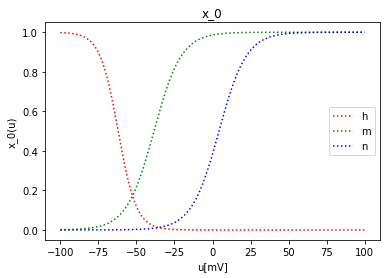

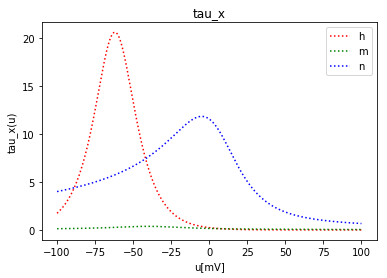

In [27]:
vm=np.linspace(-100,100,1000)*b2.mV

h = 0.25*exp(-(vm/b2.mV+90)/12)/(0.25*exp(-(vm/b2.mV+90)/12)+0.25*exp((vm/b2.mV+62)/6)/exp((vm/b2.mV+90)/12))
m = (0.182*(35+vm/b2.mV)/(1-exp(-(vm/b2.mV+35)/9)))/((0.182*(35+vm/b2.mV)/(1-exp(-(vm/b2.mV+35)/9)))-0.124*(vm/b2.mV+35)/(1-exp((vm/b2.mV+35)/9)))
n = (0.02*(-25+vm/b2.mV)/(1-exp(-(vm/b2.mV-25)/9)))/(0.02*(-25+vm/b2.mV)/(1-exp(-(vm/b2.mV-25)/9))-0.002*(vm/b2.mV-25)/(1-exp((vm/b2.mV-25)/9)))

plt.plot(vm/b2.mV, h,':r')
plt.plot(vm/b2.mV, m,":g")
plt.plot(vm/b2.mV, n, ":b")
plt.legend(["h","m","n"])
plt.title('x_0')
plt.xlabel("u[mV]")
plt.ylabel("x_0(u)")
plt.show()

h_t = 1/(0.25*exp(-(vm/b2.mV+90)/12)+0.25*exp((vm/b2.mV+62)/6)/exp((vm/b2.mV+90)/12))
m_t = 1/((0.182*(35+vm/b2.mV)/(1-exp(-(vm/b2.mV+35)/9)))-0.124*(vm/b2.mV+35)/(1-exp((vm/b2.mV+35)/9)))
n_t = 1/(0.02*(vm/b2.mV-25)/(1-exp(-(vm/b2.mV-25)/9))-0.002*(vm/b2.mV-25)/(1-exp((vm/b2.mV-25)/9)))

plt.plot(vm/b2.mV, h_t,":r")
plt.plot(vm/b2.mV, m_t,":g")
plt.plot(vm/b2.mV, n_t, ":b")
plt.legend(["h","m","n"])
plt.title('tau_x')
plt.xlabel("u[mV]")
plt.ylabel("tau_x(u)")


WARNING    D:\Anaconda3\envs\bmnn\lib\site-packages\matplotlib\axes\_base.py:3193: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))
 [py.warnings]


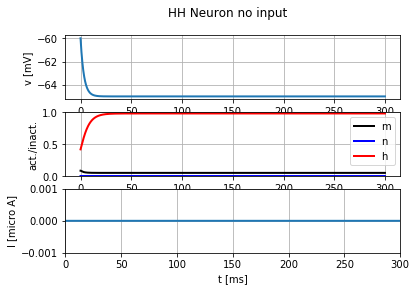

In [119]:
def modified_table_simulate_HH_neuron(input_current, simulation_time):

    """A Hodgkin-Huxley neuron implemented in Brian2.

    Args:
        input_current (TimedArray): Input current injected into the HH neuron
        simulation_time (float): Simulation time [seconds]

    Returns:
        StateMonitor: Brian2 StateMonitor with recorded fields
        ["vm", "I_e", "m", "n", "h"]
    """

    # neuron parameters
    El = -65 * b2.mV
    EK = -77 * b2.mV
    ENa = 55 * b2.mV
    gl = 0.3 * b2.msiemens
    gK = 40 * b2.usiemens       
    gNa = 25 * b2.usiemens 

    C = 1 * b2.ufarad

    # forming HH model with differential equations
    eqs = """
    I_e = input_current(t,i) : amp
    membrane_Im = I_e + gNa*m**3*h*(ENa-vm) + \
        gl*(El-vm) + gK*n**4*(EK-vm) : amp
    alphah = 0.25*exp(-(vm/mV+70)/12)/ms    : Hz
    alpham = 0.182*(35*mV+vm)/(1-exp(-(vm/mV+35)/9))/mV/ms : Hz
    alphan = 0.02*(-25*mV+vm)/(1-exp(-(vm/mV-25)/9))/mV/ms : Hz
    betah = 0.25*exp((vm/mV+42)/6)/exp((vm/mV+70)/12)/ms : Hz
    betam = -0.124*(vm/mV+35)/(1-exp((vm/mV+35)/9))/ms : Hz
    betan = -0.002*(vm/mV-25)/(1-exp((vm/mV-25)/9))/ms : Hz
    dh/dt = alphah*(1-h)-betah*h : 1
    dm/dt = alpham*(1-m)-betam*m : 1
    dn/dt = alphan*(1-n)-betan*n : 1
    dvm/dt = membrane_Im/C : volt
    """

    neuron = b2.NeuronGroup(1, eqs, method="exponential_euler")

    # parameter initialization
    neuron.vm = -60*b2.mV
    neuron.h = 0.25*exp(-(neuron.vm/b2.mV+90)/12)/(0.25*exp(-(neuron.vm/b2.mV+90)/12)+0.25*exp((neuron.vm/b2.mV+62)/6)/exp((neuron.vm/b2.mV+90)/12))
    neuron.m = (0.182*(35+neuron.vm/b2.mV)/(1-exp(-(neuron.vm/b2.mV+35)/9)))/((0.182*(35+neuron.vm/b2.mV)/(1-exp(-(neuron.vm/b2.mV+35)/9)))-0.124*(neuron.vm/b2.mV+35)/(1-exp((neuron.vm/b2.mV+35)/9)))
    neuron.n = (0.02*(-25+neuron.vm/b2.mV)/(1-exp(-(neuron.vm/b2.mV-25)/9)))/(0.02*(-25+neuron.vm/b2.mV)/(1-exp(-(neuron.vm/b2.mV-25)/9))-0.002*(neuron.vm/b2.mV-25)/(1-exp((neuron.vm/b2.mV-25)/9)))

    # tracking parameters
    st_mon = b2.StateMonitor(neuron, ["vm", "I_e", "m", "n", "h"], record=True)

    # running the simulation
    hh_net = b2.Network(neuron)
    hh_net.add(st_mon)
    hh_net.run(simulation_time)

    return st_mon


current = input_factory.get_step_current(t_start=5, 
                                         t_end=300, 
                                         unit_time =b2.ms, 
                                         amplitude=0*b2.uA)

state_monitor = modified_table_simulate_HH_neuron(current, simulation_time=300 * b2.ms)
HH.plot_data(state_monitor, title="HH Neuron no input")


# I cannot reproduce the v-t and f-i curve in Figure 2.7A&B from Chapter 2 section 2